In [34]:
%config Completer.use_jedi = False

# Chapter. 7 데커레이터

## 7.1.1 데커레이터 만들기

In [25]:
def identity(f):
    return f

@identity
def foo():
    return "bar"

foo

<function __main__.foo()>

In [33]:
# 딕셔너리 정의
_functions={}

# 함수 정의
def register(f):
    global _functions # 딕셔너리 전역 변수화
    _functions[f.__name__] = f # 딕셔너리에 들어온 함수의 이름을 키로 가지고 객체를 값으로 가지도록 설정
    return f # 함수 객체를 리턴

# @심볼의 뜻은, foo함수를 실행할 때 그 함수를 register함수에도 넣어서 register함수에서 실행하라는 뜻
@register
def foo():
    return "bar"

print(_functions["foo"]())

bar


# 배경지식

- Closure에 대해 살펴보기 전 함수 중첩, 일급 객체, nonlocal에 대해 알아본다

## 1.1 함수 중첩

In [2]:
n=int(input("정수를 입력하세요"))

if n%2 == 0:
    if n%3 ==0:
        print("6의배수")
    else:
        print("짝수")
else:
    print("홀수")

정수를 입력하세요 5


홀수


In [4]:
def greetings():
    def say_hi(): # 내부 함수
        print("Hi everyone :)")
    say_hi()
    
greetings()

Hi everyone :)


## 1.2 First Class Object(일급 객체)

- 일급객체는 해당 언어 내에서 일반적으로 다른 모든 개체에 통용가능한 동작(operation)이 지원되는 개체(entity)를 의미한다
- 이 동작은 주로
    - 1. 함수의 인자로 전달
    - 2. 함수의 반환값이 되거나
    - 3. 수정되고 할당되는 것들을 전제로 한다
- 파이썬에서 함수는 일급객체이다

In [14]:
# f라는 함수가 execute의 함수의 인자로 전달
# 함수 내부에서 인자로 받은 함수 func를 문제없이 사용
# add라는 함수객체를 f라고 하는 함수로 정의
# 이 특성이 있어야 Closure가 성립된다

def add(a,b):
    return a+b

def execute(func, *args):
    return func(*args)

f=add
execute(f, "ㅠ", "ㅁ")

'ㅠㅁ'

## 1.3 nonlocal

- inner 함수 블록 안에 있는 영역은 local 스코프라고 불린다. 로컬 영역 안의 모든 개체들은 inner 의 제어 아래에 있다.
- outer 의 안에 있되, inner 의 밖에 있는 영역은 nonlocal 스코프라고 불린다. outer 의 y 변수는 inner 입장에서는 nonlocal 스코프의 변수이다.
- outer 함수 밖의 영역은 global 스코프다. z 변수는 global 에 선언된 변수로 outer 함수뿐 아니라 다른 코드나 함수에서도 참조가능할 것이다.

In [15]:
z=3 # global 스코프
def outer(x):
    y=10 # nonlocal 스코프(inner 함수의 입장에서 보았을 때)
    def inner(): # local 스코프
        x=1000
        return x
    return inner()

outer(100)

1000

- local 영역에서 밖의 영역에 대한 값을 참조하는, 또는 읽는 것은 항상 문제가 없는데, 값을 수정하거나 새로 할당하는 것은, 쓰는 것(write)은 안 된다.
- 그것은 코드 영역의 책임과 권한을 명확히 나누는 것이 좋기 때문이다. 
- 예제의 count 함수는 하나의 내부 함수를 갖고 있지만, 어떤 경우에는 수십여개의 내부 함수를 가질 수도 있다. 이때 내부 함수마다 count의 상태값을 건드리고 수정한다면 예상하지 못한 결과를 초래할 수 있다. 

In [16]:
def count(x):
    def increment():
        x+=1
        print(x)
    increment()
    
count(5)

UnboundLocalError: local variable 'x' referenced before assignment

- 만약 위의 예제에서 의도적으로 nonlocal 스코프의 값을 수정하고 싶으면 어떻게 할까? 이때 nonlocal statement를 쓰면 된다.

In [17]:
def count(x):
    def increment():
        nonlocal x
        x+=1
        print(x)
    increment()
    
count(5)

6


- 하지만 nonlocal 선언하지 않았을 때 nonlocal스코프에 있는 y를 수정할 수 없다

In [24]:
z=3 # global 스코프
def outer(x):
    y=10 # nonlocal 스코프(inner 함수의 입장에서 보았을 때)
    def inner(): # local 스코프
#         nonlocal y
        y+=1000
        return y
    return inner()

outer(100)

UnboundLocalError: local variable 'y' referenced before assignment

- nonlocal 스코프인 y를 nonlocal로 지정하고 y를 수정할 수 있다

In [25]:
z=3 # global 스코프
def outer(x):
    y=10 # nonlocal 스코프(inner 함수의 입장에서 보았을 때)
    def inner(): # local 스코프
        nonlocal y
        y+=1000
        return y
    return inner()

outer(100)

1010

- 하지만 nonlocal 스코프가 아닌 global 스코프인 z에 대해서는 nonlocal을 선언하면 에러가 난다
- 에러메시지는 바인딩할 nonlocal 변수 z를 발견하지 못했다 이다

In [26]:
z=3 # global 스코프
def outer(x):
    y=10 # nonlocal 스코프(inner 함수의 입장에서 보았을 때)
    def inner(): # local 스코프
        nonlocal z
        z+=1000
        return y
    return inner()

outer(100)

SyntaxError: no binding for nonlocal 'z' found (<ipython-input-26-ab4bb4500a5e>, line 5)

- 만약 z가 nonlocal 스코프 안으로 들어오게 되면 가능해진다

In [27]:
def outer(x):
    y=10 # nonlocal 스코프(inner 함수의 입장에서 보았을 때)
    z=3  # nonlocal 스코프
    def inner(): # local 스코프
        nonlocal z
        z+=1000
        return y
    return inner()

outer(100)

10

- 혹은 global 스코프인 z 변수를 global 선언 해주면 된다

In [31]:
z=3  # global 스코프
def outer(x):
    y=10 # nonlocal 스코프(inner 함수의 입장에서 보았을 때)
    def inner(): # local 스코프
        nonlocal y
        global z
        z+=1000
        y+=100
        return y,z
    return inner()

outer(100)

(110, 1003)

## 1.4 Closure

- 파이썬에서 클로저는 ‘자신을 둘러싼 스코프(네임스페이스)의 상태값을 기억하는 함수’다. 그리고 어떤 함수가 클로저이기 위해서는 다음의 세 가지 조건을 만족해야 한다.

1. 해당 함수는 어떤 함수 내의 중첩된 함수여야 한다.
2. 해당 함수는 자신을 둘러싼(enclose) 함수 내의 상태값을 반드시 참조해야 한다.
3. 해당 함수를 둘러싼 함수는 이 함수를 반환해야 한다.

In [111]:
# 이 함수를 실제로 적용해보기 전에, wrapper 함수에 대해 살펴보자. 위에서 어떤 함수의 클로저이기 위한 특징을 살폈는데 공교롭게도 이 함수는 클로저이기 위한 조건을 모두 충족한다.

# in_cache 함수 내의 중첩된 함수이고,
# Enclosing하는 in_cache 스코프의 cache 라는 상태값을 참조하고 있으며,
# 자신을 둘러싼 함수는 자신(wrapper)을 반환하고 있다!

def in_cache(func):
    cache = {}
    def wrapper(n): # 중첩됨
        print(cache)
        if n in cache: # enclosing하는 in_cache 스코프의 cache라는 딕셔너리를 참조
            return cache[n]
        else:
            cache[n]=func(n)
            return cache[n]
    return wrapper # 자신을 반환

일단 wrapper 는 정의상 클로저라는 얘기이고, 이 함수를 제대로 사용해보자.
위 포스트의 팩토리얼 함수를 하나 가져와서 in_cache 를 적용해보겠다.

In [112]:
def factorial(n):
    ret = 1
    for i in range(1, n+1):
        ret *= i
    return ret

In [113]:
factorial = in_cache(factorial)

In [114]:
factorial

<function __main__.in_cache.<locals>.wrapper(n)>

- 이제 진짜 핵심으로 들어간다. 그 클로저라는 wrapper 함수 안에 cache 의 상태값을 출력하는 코드를 넣었다.
- 저 코드는 wrapper 을 enclosing 하는 스코프의 cache 변수를 추적한다.
- 이제 함수를 몇 번 실행해보자.

In [115]:
factorial(3)

{}


6

In [116]:
factorial(6)

{3: 6}


720

In [117]:
factorial(10)

{3: 6, 6: 720}


3628800

In [118]:
factorial(1)

{3: 6, 6: 720, 10: 3628800}


1

In [119]:
factorial(1)

{3: 6, 6: 720, 10: 3628800, 1: 1}


1

### 1.4.1 Closure 특징

- 일단 눈에 띠는 특징으로 클로저는 자신을 둘러싼 함수 스코프의 상태값을 참조하는데, 이 값은 함수가 메모리에서 사라져도 값이 유지가 된다.

In [120]:
def times_multiply(n):
    def multiply(x):
        return n*x
    return multiply

times_3=times_multiply(3)
times_4=times_multiply(4)

times_3, times_4

(<function __main__.times_multiply.<locals>.multiply(x)>,
 <function __main__.times_multiply.<locals>.multiply(x)>)

In [121]:
times_3(5), times_4(5)

(15, 20)

- 해당 함수를 메모리에서 지우더라도 클로저에 영향을 미치지 않고 원 함수의 변화에서도 자신의 스코프는 지킨다

In [62]:
del(times_multiply)

In [124]:
times_3(7)

21

- 두 번째 특징으로 클로저에서 자신 안에 정의된 내부 변수가 아닌, Enclosing하고 있는 변수에 접근하는 것을 파이썬에서 지원하고 있다.

In [64]:
times_4.__closure__

(<cell at 0x00000160490D5AC8: int object at 0x000000006ECDB120>,)

In [65]:
times_4.__closure__[0].cell_contents

4

In [66]:
def in_cache(func):
    cache = {}
    def wrapper(n): # 중첩됨
        print(cache)
        if n in cache: # enclosing하는 in_cache 스코프의 cache라는 딕셔너리를 참조
            return cache[n]
        else:
            cache[n]=func(n)
            return cache[n]
    return wrapper # 자신을 반환

@in_cache
def factorial(n):
    ret = 1
    for i in range(1, n+1):
        ret *= i
    return ret

factorial(10)

{}


3628800

In [67]:
factorial(20)

{10: 3628800}


2432902008176640000

In [68]:
factorial(2)

{10: 3628800, 20: 2432902008176640000}


2

In [89]:
factorial.__closure__[0].cell_contents, factorial.__closure__[1].cell_contents

({10: 3628800, 20: 2432902008176640000, 2: 2},
 <function __main__.factorial(n)>)

# 7.1.2 데커레이터 사용하기

- 데커레이터는 함수를 중심으로 반복되는 코드를 리팩토링할 때 자주 사용된다.
- 인수로 수신되는 사용자 이름이 관리자인지 아닌지 확인하고, 사용자가 관리자가 아니면 예외를 발생시켜야 하는 다음 함수 집합을 고려해보자

- 기본 함수

In [ ]:
class Store(object):
    def get_food(self, username, food):
        if username != "admin":
            raise Exception("This user is not allowed to get food")
        return self.storage.get(food)
    
    def put_food(self, username, food):
        if username != "admin":
            raise Exception("This user is not allowed to put food")
        self.storage.put(food)

- check_is_admin 함수를 사용

In [94]:
def check_is_admin(username):
    if username != "admin":
        raise Exception("This user is not allowed to put food")

class Store(object):
    def get_food(self, username, food):
        check_is_admin(username)
        return "get " + food

    def put_food(self, username, food):
        check_is_admin(username)
        return "put " + food

s=Store()
s.get_food("admin","f3")

'get f3'

- 데커레이터를 사용

In [108]:
def check_is_admin(f):
    def wrapper(*args, **kwargs):
        print(f"*args : {args}")
        print(f"*kwargs : {kwargs}")
        if kwargs.get("username") != "admin":
            raise Exception("This user is not allowed to get or put food")
        return f(*args, **kwargs)
    return wrapper

class Store(object):
    @check_is_admin
    def get_food(self, username, food):
        return "get " + food
    
    @check_is_admin
    def put_food(self, username, food):
        return "put " + food
    
s=Store()
s.get_food(username="admin", food="Pizza")

*args : (<__main__.Store object at 0x000001604AFD86A0>,)
*kwargs : {'username': 'admin', 'food': 'Pizza'}


'get Pizza'

# 7.1.3 여러 데커레이터 사용

In [117]:
usernames=["admin","user1"]
def check_user_is_not(username):
    def user_check_decorator(f):
        def wrapper(*args, **kwargs):
            if kwargs.get("username") not in usernames:
                raise Exception("This user is not allowed to get food")
            return f(*args, **kwargs)
        return wrapper
    return user_check_decorator
        
class Store(object):
    @check_user_is_not("admin")
    def get_food(self, username, food):
        return "get " + food
    
s=Store()
s.get_food(username="user1", food="Pizza")

'get Pizza'

# 7.1.4 클래스 데커레이터 사용하기

In [119]:
import uuid

def set_class_name_and_id(klass):
    klass.name = str(klass)
    klass.random_id = uuid.uuid4()
    return klass

- 함수 데커레이터와 마찬가지로 클래스를 조작하는 공통 코드를 팩터링하는데 유용할 수 있다.

In [126]:
# 아직 정의하지 않은 SomeClass라고 하는 클래스의 name 인자와 random_id 인자가 들어있는 것을 확인할 수 있다.
@set_class_name_and_id
class SomeClass(object):
    pass

SomeClass.name, SomeClass.random_id

("<class '__main__.SomeClass'>", UUID('8b11ffde-a8ca-43f1-9d00-103b31f35b78'))

- 클래스 데커레이터의 또 다른 용도는 함수 또는 클래스를 클래스로 래핑하는 것이다
- 클래스 데커레이터는 상태를 저장하는 함수를 래핑하는데 자주 사용된다
- 다음 예제에서는 print()함수를 래핑하여 세션에서 호출된 횟수를 확인한다.

- print_hello라고 하는 함수에 데커레이터의 생성자들이 메서드 형식으로 나온다

In [149]:
class CountCalls(object):
    def __init__(self, f):
        self.f = f
        self.called = 0
        self.total = 0
    def __call__(self, *args, **kwargs): #__call__은 클래스가 호출되었을 때 수행된다
        self.called+=1
        self.total+=1
        if self.called > 100:
            self.called = 0
        return self.f(*args, **kwargs)
    
@CountCalls
def print_hello():
    print("hello")

In [155]:
for i in range(100) : print_hello()

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello


In [156]:
print_hello.f, print_hello.called, print_hello.total

(<function __main__.print_hello()>, 9, 110)

### __call__에 대한 설명

- 함수를 호출하는 것처럼 클래스의 객체도 호출할 수 있게 만들수 있는데 이때 필요한 매직메소드가 __call__이다.

- A 클래스 생성 이후 a에 할당 -> init 생성자 생성되었음

In [162]:
class A:
    def __init__(self):
        print("From init ... ")
a = A()

From init ... 


In [168]:
a

- a를 call하면 에러가 난다 -> callable 할 수 없다는 뜻

In [163]:
a()

TypeError: 'A' object is not callable

- 클래스 B를 생성하고 __call__ 매직메서드를 정의한다

In [165]:
class B:
    def __init__(self):
        print("From init ... ")
    def __call__(self):
        print("From call ... ")

- b에 클래스 B를 할당 -> 생성자 생성되었음

In [166]:
b = B()

From init ... 


- b 를 call 하면, b()를 하면, 매직메서드 __call__에 있는 print가 수행된다

In [167]:
b()

From call ... 


# 7.2 파이썬에서 메서드가 작동하는 방법

- 메서드는 클래스 속성으로 저장되는 함수입니다. 이러한 속성에 직접 액세스하려고 할 때 어떤 일이 발생하는지 알아본다.

In [171]:
class Pizza(object):
    def __init__(self, size):
        self.size=size
    def get_size(self):
        return self.size
    
Pizza.get_size

<function __main__.Pizza.get_size(self)>

- 아래와 같이 할 경우에는 파이썬은 필요한 자기 인수(self)를 제공하지 않았다고 오류를 발생시킨다
    - 왜냐하면 Pizza의 클래스 안의 get_size는 클래스를 받아야하는데 받지 않았으므로
- 실제로 객체에 구속되지 않기 때문에 자체 인수를 자동으로 설정할 수 없다.
    - 객체에 구속되지 않았다는 뜻은 객체를 정의하지 않았다는 뜻?
- 그러나 원한다면 클래스의 임의 인스턴스를 메서드에 전달하여 get_size()함수를 사용할 수 있을 뿐만 아니라 메서드가 찾을 것으로 예상되는 속성이 있는 한 모든 객체를 전달하여 사용할 수도 있다.
    - get_size에 Pizza클래스를 전달해서 get_size()함수를 작동시킬 수 있다는 뜻인 것 같다

In [183]:
Pizza.get_size()

TypeError: get_size() missing 1 required positional argument: 'self'

- 아래처럼 객체를 직접 전달하여 get_size 함수를 실행시킬 수는 있다 하지만 편리하지는 않다

In [184]:
Pizza.get_size(Pizza(42))

42

- 위보다 더 나은 방법은, 자동으로 객체 자체를 메서드의 자체 매개변수로 전달하는 것

In [185]:
Pizza(42).get_size

<bound method Pizza.get_size of <__main__.Pizza object at 0x000001604B3E2048>>

In [186]:
Pizza(42).get_size()

42

- 예상대로 get_size에 어떠한 인수를 제공하지 않아도 된다
- 바운드 메서드이기 때문에 자체 인수는 자동으로 Pizza인스턴스로 설정된다.
- 더 명확한 예는 아래와 같다

In [187]:
m=Pizza(42).get_size
m()

42

In [188]:
m=Pizza(42)
m.get_size()

42

In [194]:
m.get_size.__self__

# 7.3 정적 메서드

- 인스턴스를 생성하고 호출하는 방식이 아니라 클래스에서 바로 호출할 수 있음
- 정적 메서드는 클래스의 인스턴스가 아니라 클래스에 속하므로 실제로 클래스 인스턴스에서 작동하거나 영향을 주지 않는다
- 대신 정적 메서드는 가지고 있는 매개변수에서 작동한다
- 정적 메서드는 일반적으로 클래스 또는 해당 객체의 상태에 의존하지 않기 때문에 유틸리티 함수를 만드는데 사용된다.

- 예를 들어, 정적 mix_ingredients()메서드는 Pizza 클래스에 속하지만, 클래스와 상관없이 mix_ingredients()메서드를 사용할 수 있다.

In [196]:
class Pizza(object):
    
    @staticmethod
    def mix_ingredients(x,y):
        return x + y
    
    def cook(self):
        return self.mix_ingredients(self.cheese, self.vegetables)

In [198]:
# 아래와 같이 하면 두 개는 서로 다른 메모리에 로드되어서 다른 것이 된다
Pizza().cook is Pizza().cook

False

In [202]:
Pizza().cook

<bound method Pizza.cook of <__main__.Pizza object at 0x000001604B3F9320>>

In [203]:
Pizza().cook

<bound method Pizza.cook of <__main__.Pizza object at 0x000001604B7DC278>>

In [207]:
Pizza.mix_ingredients(1,2)

3

In [201]:
Pizza().mix_ingredients is Pizza.mix_ingredients

True

# 7.4 클래스 메서드

In [209]:
class Pizza(object):
    radius=42
    
    @classmethod
    def get_radius(cls):
        return cls.radius

In [210]:
Pizza.get_radius

<bound method Pizza.get_radius of <class '__main__.Pizza'>>

In [211]:
Pizza().get_radius

<bound method Pizza.get_radius of <class '__main__.Pizza'>>

In [212]:
# 클래스메서드가 선언되어 있는 클래스의 상태 및 메서드에 엑세스가 가능..?
Pizza.get_radius()

42

In [213]:
class Pizza(object):
    def __init__(self, ingredients):
        self.ingredients = ingredients
        
    @classmethod
    def from_fridge(cls, fridge):
        return cls(fridge.get_cheese() + fridge.get_vegetables())

## 정적메서드와 클래스메서드의 차이 비교

- 공통점
    - 클래스 메서드와 정적 메서드는 별도 인스턴스 생성없이 클래스를 대상으로 클래스 이름 뒤에 바로 . 오퍼레이터를 붙여 호출 할 수 있다

<br><br>

- 차이점
    - 클래스 메서드
        - 호출 할 때 첫 번째 인자로 클래스 자체가 넘어오기 때문에 클래스 속성에 접근하거나 다른 클래스 함수를 호출 할 수 있다
        
    - 정적 메서드
        - 호출 할 때 첫 번째 인자로 아무것도 넘어오지 않기 때문에 명시적으로 넘긴 다른 인자만 접근할 수 있다

In [273]:
class Character:

    def __init__(self,A,B,C):
        self.A=A
        self.B=B
        self.C=C
    
    # 클래스 메서드는 아래처럼 첫 번째 인자로 클래스 자체가 넘어온다
    # 그러므로 첫 번째 클래스인 cls를 활용하여 다시 cls(4,5,6).A를 해서 클래스의 A인스턴스에 접근이 가능하다
    @classmethod
    def class_check(cls,x,y):
        print(x,"+", y, "=" ,x+y)
        print(cls(4,5,6).A)
    
    # 정적 메서드는 첫 번째 인자로 아무것도 넘어오지 않기때문에 명시적으로 넘긴 다른 인자(x,y)만 접근가능하다 !
    @staticmethod
    def static_plus(x,y):
        print(x,"+", y, "=" ,x+y)

In [274]:
Character.static_plus(1,2)

1 + 2 = 3


In [276]:
# 정적 메서드와는 다르게 넘어온 클래스에서 생성자 A를 추가로 print하였다
Character.class_check(1,2)

1 + 2 = 3
4


In [226]:
Language().print_language()

나의 언어는 English


In [125]:
class Language:
    default_language = "English"

    def __init__(self):
        self.show = '나의 언어는 ' + self.default_language

    # 첫 번째 파라미터로 클래스가 들어온다
    @classmethod
    def class_my_language(cls):
        return cls()

    @staticmethod
    def static_my_language():
        return Language()

    def print_language(self):
        print(self.show)


class KoreanLanguage(Language):
    default_language = "한국어"

In [126]:
static = KoreanLanguage.static_my_language()
static.print_language()

나의 언어는 English


In [127]:
clss = KoreanLanguage.class_my_language()
clss.print_language()

나의 언어는 한국어


# 7.5 추상메서드

- 추상 클래스는 메서드의 목록만 가진 클래스이며 상속받는 클래스에서 메서드 구현을 강제하기 위해 사용
- 추상 기본 클래스 자체를 인스턴스화하는 것은 불가능하다
        - 추상 기본 클래스를 인스턴스화하는 것은 불가능하기 때문에 추상 메서드를 만들때는 pass만 넣어서 빈 메서드로 만든다
        - 왜냐하면 인스턴스를 만들 수 없으니 추상 메서드도 호출할 일이 없기 때문이다

In [278]:
from abc import *

class StudentBase(metaclass=ABCMeta):
    
    # 추상 메서드의 경우에는 인스턴스화할 수 없으므로 pass한다
    
    @abstractmethod
    def study(self):
        pass
    
    @abstractmethod
    def go_to_school(self):
        pass
    
# Student 클래스에서 StudentBase 추상 클래스를 상속하였다
# 이러한 경우에 Student 클래스는 StudentBase 추상 클래스의 모든 추상 메서드를 구현하여야만 한다
# 그런데 아래의 클래스에서는 StudentBase 추상 클래스에 있는 두 개의 추상 메서드 중에 하나밖에(study)밖에 구현하지 않았으므로 에러를 일으킨다ㅣ
class Student(StudentBase):
    def study(self):
        print("공부하기")
    
    

In [280]:
james=Student()

TypeError: Can't instantiate abstract class Student with abstract methods go_to_school

- 추상클래스를 마저 정의한다
- 참고로 추상 클래스의 추상 메서드를 모두 구현했는지 확인하는 시점은 파생 클래스가 인스턴스를 만들 때이다.
        - 그러므로 james = Student()를 실행시켰을 때 확인이 가능하다

In [282]:
class Student(StudentBase):
    def study(self):
        print("공부하기")
        
    def go_to_school(self):
        print("학교가기")
        
james=Student()
james.study(), james.go_to_school();

공부하기
학교가기


In [293]:
int.mro()

[int, object]

# 7.6 정적, 클래스, 추상 메서드 혼합하기

In [311]:
class BasePizza(metaclass=ABCMeta):
    
    # 추상 클래스 및 추상 메서드
    @abstractmethod
    def get_ingredients(self):
        """재료를 출력한다"""
        pass
    def Egg():
        return "egg"
    
class Calzone(BasePizza):
    ingredients=["cheese","dough"]

    def get_ingredients(self, with_egg=False):
        egg=BasePizza.Egg()
        return self.ingredients + [egg]

In [313]:
cal=Calzone()
cal.get_ingredients()

['cheese', 'dough', 'egg']

In [314]:
class BasePizza(metaclass=ABCMeta):
    ingredients=["cheese"]
    
    @classmethod
    @abstractmethod
    def get_ingredients(cls):
        """재료를 출력한다"""
        return cls.ingredients

- 추상 메서드 get_ingredients는 하위 클래스에서 구현해야 하지만 클래스 메서드이기도 하며, 이는 수신할 첫 번째 인수가 객체가 아닌 클래스가 된다는 것을 의미한다.

In [318]:
class BasePizza(object, metaclass=ABCMeta):
    default_ingredients=["cheese"]
    
    @classmethod
    @abstractmethod
    def get_ingredients(cls):
        """재료를 출력한다"""
        return cls.default_ingredients
    
    def Egg():
        return "egg"
    
class DietPizza(BasePizza):
    def get_ingredients(self):
        return [BasePizza.Egg()] + super(DietPizza, self).get_ingredients()

In [319]:
p=DietPizza()
p.get_ingredients()

['egg', 'cheese']

# 7.7 다중 상속

- 다중 상속은 여러 기반 클래스로부터 상속을 받아서 파생 클래스를 만드는 방법

In [320]:
def parent():
    return object

class A(parent()):
    pass

A.mro()

[__main__.A, object]

- super 객체를 인스턴스화하는 생성자 super()함수

In [321]:
class A(object):
    bar=42
    def foo(self):
        pass
    
class B(object):
    bar=0

    
class C(A,B):
    xyz="abc"
    
C.mro()

[__main__.C, __main__.A, __main__.B, object]

## 7.7.1 다이아몬드 상속

In [322]:
class A:
    def greeting(self):
        print('안녕하세요. A입니다.')
 
class B(A):
    def greeting(self):
        print('안녕하세요. B입니다.')
 
class C(A):
    def greeting(self):
        print('안녕하세요. C입니다.')
 
class D(B, C):
    pass
 
x = D()
x.greeting()    # 안녕하세요. B입니다.

안녕하세요. B입니다.


- 기반 클래스 A가 있고 B,C는 A를 상속받는다 그리고 다시 D는 B,C를 상속받는다.
- 이 관계를 그림으로 나타내면 다음과 같다

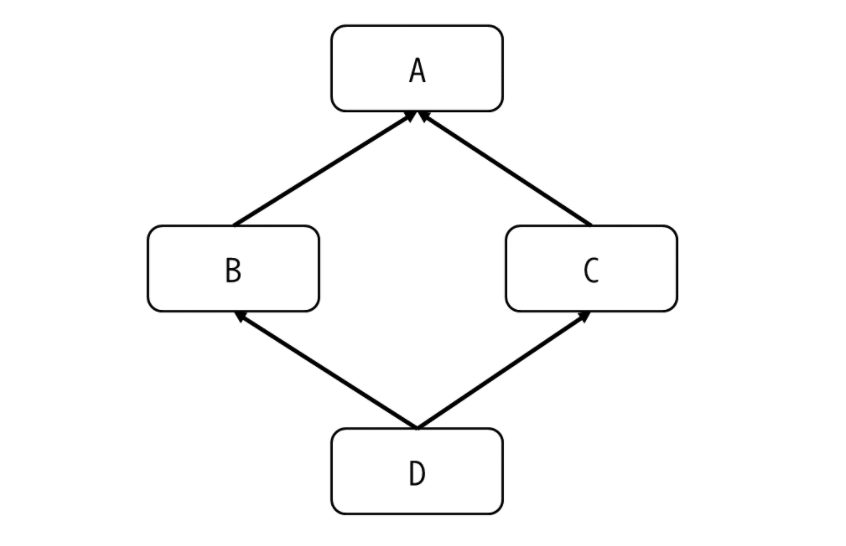
- 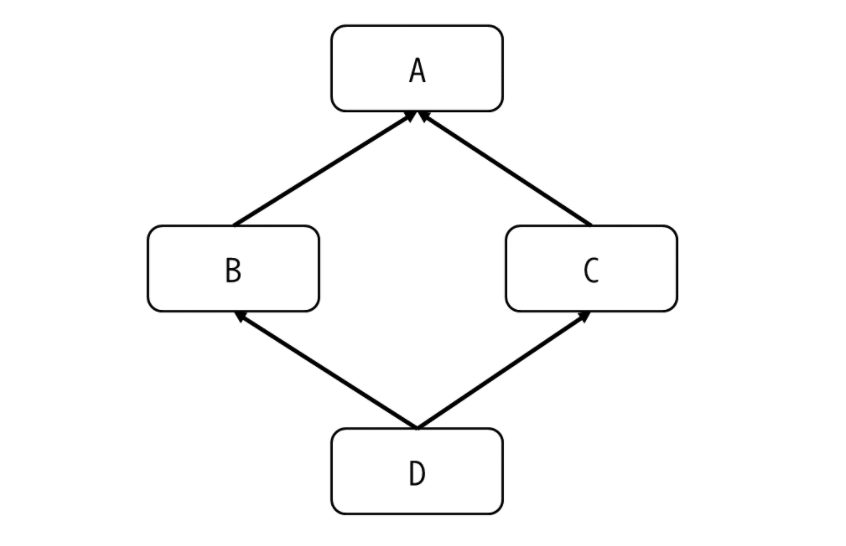


- 그런데 A,B,C모두 greeting이라는 같은 메서드를 가지고 있다면 D는 어떤 클래스의 메서드를 호출해야 할까?

## 7.7.3 오버라이딩

- 오버라이딩은 무시하다, 우선하다 라는 뜻
- 기반 클래스의 메서드를 무시하고 새로운 메서드를 만든다는 뜻
- 여기서는 Person 클래스의 gretting 메서드를 무시하고 Student클래스에서 새로운 gretting을 만들었다

In [329]:
class Person:
    def gretting(self):
        print("안녕하세요.")
        
class Student(Person):
    def greeting(self):
        print("안녕하세요 저는 파이썬 코딩 도장 학생입니다")
        
james=Student()
james.greeting()

안녕하세요 저는 파이썬 코딩 도장 학생입니다


In [330]:
Student.mro()

[__main__.Student, __main__.Person, object]

- 메서드 오버라이딩은 왜 사용하나?
    - 보통 프로그램에서 어떤 기능이 같은 메서드 이름으로 계속 사용되어야 할 때 메서드 오버라이딩을 활용한다
    - 만약 Student클래스에서 인사하는 메서드를 greeting2로 만들어야 한다면 모든 소스코드에서 메서드 호출 부분을 greeting2로 수정해야 한다
- 아래와 같은 경우에 기반 클래스의 메서드를 재활용하여 중복을 줄일 수 있다

In [332]:
class Person:
    def greeting(self):
        print('안녕하세요.')
class Student(Person):
    def greeting(self):
        super().greeting()    # 기반 클래스의 메서드 호출하여 중복을 줄임
        print('저는 파이썬 코딩 도장 학생입니다.')
        
james = Student()
james.greeting()

안녕하세요.
저는 파이썬 코딩 도장 학생입니다.


## 7.7.2 메서드 탐색 순서 확인하기
- 위의 클래스에서는 D가 B와C를 상속받고 B와C는 A를 상속받았다 그리고 모든 클래스는 greeting이라는 메서드를 갖고 있다
- 이럴 경우에 D에서 greeting을 실행하는 순서를 확인해본다

In [323]:
D.mro()

[__main__.D, __main__.B, __main__.C, __main__.A, object]

## 7.7.3 Super 메서드

In [341]:
class A(object):
    bar=42
    def foo(self):
        pass

class B(object):
    bar=0

class C(A,B):
    xyz="abc"
    
class D(B,A):
    xyz="efg"
    
C.mro()

[__main__.C, __main__.A, __main__.B, object]

- C는 A와 B를 상속받았고 메서드 탐색 순서를 보면 C->A->B 순서로 진행된다
- 그러므로 C에 bar가 없고 A에 bar를 먼저 탐색해서 A의 bar 인스턴스를 출력한다
- 만약 C(B,A)의 경우라면 탐색순서가 C->B->A가 되므로 B의 bar 인스턴스를 출력한다

In [343]:
super(C,C()).bar, super(D,D()).bar

(42, 0)

In [344]:
# 똑같이 A와 B를 상속받았지만 순서에 따라서 다른 bar 인스턴스를 출력한다
C.bar, D.bar

(42, 0)

# Chapter. 8 함수형 프로그래밍

## 8.2 제너레이터

- 제너리이터는 이터레이터처럼 작동하는 객체
- StopIteration이 발생할 때까지 next()메서드의 각 호출에 값을 생성하고 반환
- 제너레이터를 만들려면 yield문이 포함된 일반 파이썬 함수를 작성하며 파이썬은 yield의 사용을 감지하고 함수에 태그를 붙인다
- 실행이 yield문에 도달하면 함수는 return문과 마찬가지로 값을 반환
- 함수가 실행되면 실행 체인이 스택을 생성하며 함수 호출은 서로 스택으로 쌓인다
- 함수가 반환되면 스택에서 제거되고 함수가 반환하는 값을 호출 함수에 전달
- 파이썬은 함수의 상태를 스택 참조로 저장하여 제너레이터의 다음 반복이 필요할 때 저장한 지점에서 제너레이터의 실행을 다시 시작

In [363]:
def mygenerator():
    yield 1
    yield 2
    yield 'a'
    
mygenerator()

<generator object mygenerator at 0x000001604B847D00>

In [368]:
# yield문이 다 실행되면 next()호출에서 StopIteration이 발생
g=mygenerator()

next(g), next(g), next(g)

(1, 2, 'a')

- 제너레이터를 사용하지 않고 데이터를 반복할 때 전체 파이썬 리스트를 먼저 작성하면 메모리를 낭비한다

In [367]:
next(g)

StopIteration: 

### 8.2.2 yield로 값 반환 및 전달하기

- yield문은 함수 호출과 동일한 방식으로 값을 반환할 수 있다
- yield문으로 하면 sned()메서드를 호출하여 값을 제너레이터에 전달할 수 있다
- sned()를 사용하는 예로, 문자열 파이썬 리스트를 가져와서 동일한 문자열로 구성된 파이썬 리스트를 반환하는 shorten()이라는 함수를 작성

In [400]:
def shorten(string_list):
    length = len(string_list[0])
    for s in string_list:
        print("a", length)
        length = yield s[:length]
        print("b", length)
        
mystringlist=["loremipsum","dolorsit","ametfoobar"]
shortstringlist=shorten(mystringlist)
result=[]

try:
    # 첫 번째는 그냥 append
    s=next(shortstringlist)
    result.append(s)
    while True:
        number_of_vowels=len(list(filter(lambda letter : letter in "aeiou", s)))
        # 이전 실행 결과에 있는 모음 개수를 기준으로
        # 이어지는 문자열을 처리한다
        # length는 4가 되어 s[:length]를 return하고 멈춤
        # 다시 length는 2가 되어 s[:length]를 return하고 멈춤
        s=shortstringlist.send(number_of_vowels)
        result.append(s)
except StopIteration:
    pass

print(result)

a 10
b 4
a 4
b 2
a 2
b 1
['loremipsum', 'dolo', 'am']


In [406]:
s=[1,2,3,4,5,6, 7,8,9,10]
list(filter(lambda x : (x+1)/2 in [1,2,3], s))

[1, 3, 5]

In [543]:
y = 0
def get_first(x):
    
    global y
    y += 1
    if y < 3:
        yield y
    else:
        while True:
            x = yield x*2, y
        
next(get_first(2))

1

In [549]:
next(get_first(7))

(14, 7)

###  8.2.3 제너레이터 검사하기

In [554]:
import inspect

def mygenerator():
    yield 1
    
inspect.isgeneratorfunction(mygenerator), inspect.isgeneratorfunction(sum)

(True, False)

In [555]:
import inspect

def mygenerator():
    yield 1
    
gen = mygenerator()
gen

<generator object mygenerator at 0x000001604EE41728>

In [556]:
inspect.getgeneratorstate(gen)

'GEN_CREATED'

In [557]:
next(gen)

1

In [558]:
inspect.getgeneratorstate(gen)

'GEN_SUSPENDED'

In [559]:
next(gen)

StopIteration: 

In [560]:
inspect.getgeneratorstate(gen)

'GEN_CLOSED'

## 8.3 리스트 제너레이션

## 8.4 함수형, 함수, 함수화

### 8.4.1 map()으로 각 항목에 함수 적용하기

In [564]:
list(map(lambda x:x + "bzz!", ["i think", "i'm good"]))

['i thinkbzz!', "i'm goodbzz!"]

### 8.4.2 filter()로 파이썬 리스트 필터링하기

In [565]:
filter(lambda x:x.startswith("I "), ["I think", "I'm good"])

In [570]:
list(filter(lambda x:x.startswith("I "), ["I think", "I'm good"])), [i for i in ["I think", "I'm good"] if i.startswith("I ")]

(['I think'], ['I think'])

### 8.4.3 enumerate()로 인덱스 얻기

### 8.4.4 sorted()로 파이썬 리스트 정렬하기

In [574]:
sorted([("a",2),("c",1),("d",4)], key=lambda x:x[0])

[('a', 2), ('c', 1), ('d', 4)]

### 8.4.5 any() 및 all()로 조건을 충족하는 항목 찾기

- any(iterable) 및 all(iterable)함수는 iterable에서 반환되는 값에 따라 불리언 값을 반환한다

In [585]:
# def all(iterable):
#     for x in iterable:
#         if not x:
#             return False
#     return True

# def any(iterable):
#     for x in iterable:
#         if x:
#             return True
#     else:
#         return False

In [578]:
mylist=[0,1,3,-1]
if all(map(lambda x:x>0, mylist)):
    print("All imtes are grater than 0")
    
if any(map(lambda x:x>0, mylist)):
    print("At least one item is greater than 0")

At least one item is greater than 0


In [581]:
list(map(lambda x:x>0, mylist))

[False, True, True, True, True]

In [587]:
mylist=[-1,2,3,4,5]

# 모든 값이 0이상이면 True를 출력하는 코드

if all(map(lambda x:x>0, mylist)) == True:
    print("True1")

if any(map(lambda x:x<0, mylist)) == True:
    print("True2")

# 하나 이상의 값이 0 이하이면 True를 출력하는 코드

True2


### 8.4.6 리스트와 zip() 결합하기

- zip( iter1  [ , iter2  [...] ] ) 형식을 취한다
- 여러 시퀀스를 가지고 튜플로 결합한다

In [588]:
key=["foobar","barzz","ba!"]

list(map(len, key))

[6, 5, 3]

In [593]:
list(zip(key, map(len, key)))

[('foobar', 6), ('barzz', 5), ('ba!', 3)]

In [594]:
dict(zip(key, map(len, key)))

{'foobar': 6, 'barzz': 5, 'ba!': 3}

In [601]:
list(zip(key, map(len, zip(key, map(len, key)))))

[('foobar', 2), ('barzz', 2), ('ba!', 2)]

### 8.4.7 해결된 일반적인 문제

- 다음과 같은 함수를 사용하여 조건을 충족하는 첫 번째 항목을 찾을 수 있습니다

In [603]:
def first_positive_number(numbers):
    for n in numbers:
        if n > 0 :
            return n

- first_positive_number()함수를 다음과 같은 함수형 스타일로 다시 작성할 수 있습니다.

In [605]:
def first(predicate, items):
    for item in items:
        if predicate(item):
            return item
        
first(lambda x:x>0, [-1,0,1,2])

1

- 위와 같이 조건자(x>0)가 인수로 전달되는 함수 접근 방식을 사용하면 함수를 쉽게 재사용할 수 있다

In [611]:
# 효율적이지 않은 방법
# 조건을 충족하는 항목이 없다면 IndexError가 발생
print(list(filter(lambda x: x>0, [-1, 0, 1, 2]))[0])

# 효율적인 방법
print(next(filter(lambda x:x>0, [-1,0,1,2])))

1
1


- indexError가 발생하지 않도록 next를 사용할 수 있다

In [613]:
a = range(10)
next(x for x in a if x>3)

4

- 하지만 조건이 충족될 수 없는 경우에는 StopIteration이 발생

In [614]:
a = range(10)
next(x for x in a if x>11)

StopIteration: 

- 이럴 때는 next()에 두 번째 인수를 추가하여 해결할 수 있음

In [615]:
next((x for x in a if x>11), "NoMatching")

'NoMatching'

#### first()를 사용하여 항목찾기

In [618]:
! pip install first

In [619]:
from first import first

first([0, False, None, [], (), 42])

42

In [621]:
first([-1,0,1,2])

-1

In [627]:
first([-1,0,1,2], key=lambda x:x>3, default='ha')

'ha'

#### functools와 lambda() 사용하기

- lambda()함수는 map() 및 filter()와 같은 프로그래밍 함수를 쉽게 작성하기 위해 파이썬에 추가 되었다
- 만약 이 함수가 없었다면 다른 조건을 확인하려고 할 때마다 완전히 새로운 함수를 작성했을 것이다
- 위의 코드를 lambda를 사용하지 않고 작성해보자 


In [628]:
def grater_than_zero(number):
    return number > 0

first([-1, 0, 1, 2], key=grater_than_zero)

1

- first 모듈에는 key인수가 포함되어 있는데 각 항목을 인수로 수신하고 조건을 준수하는지 파악하는 불리언을 반환하는 함수를 제공한다
- 그러나 한 줄 이상의 코드가 필요하므로 key함수를 전달할 수 없으며 이것은 lambda의 한계입니다
- 필요한 각 key에 대해서 새 함수를 정의하는 번거로운 패턴으로 돌아가야 합니다. 꼭 이렇게 해야 할까요?
- functools 패키지에는 lambda에 대한 더 유연한 대안을 우리에게 제공하는 partial() 메서드가 있습니다.
- functools.partial() 메서드를 사용하면 함수의 동작을 변경하거나 인수를 변경하는 대신 트위스트를 사용하여 래퍼 함수를 만들 수 있다

In [633]:
from functools import partial
from first import first

def greater_than(number, mn=0):
    return number>mn

# 아래와 같은 lambda 함수에서는 greater_than 의 mn 인자를 건드릴 수 없다
# grater_than([-1,0,1,2], key=lambda x:x>3, default='ha')

first([-1,0,1,2], key=partial(greater_than, mn=0))

1

- 아래와 같이 응용 가능하다

In [639]:
operator.le(0,1)

True

In [640]:
import operator
from functools import partial
from first import first

first([-1,0,1,2], key=partial(operator.le, -1))

-1

### 8.4.8 유용한 itertools 기능

- 책 참고( p.192 ~ p.193 )

# Chapter. 10 성능과 최적화

In [4]:
# KeyError가 발생했을 때 None을 return 하는 함수
def get_fruits(basket, fruit):
    try:
        return basket[fruit]
    except KeyError:
        return None

In [2]:
# 딕셔너리 안에 fruit이 있을 때만 return 하는 함수
def get_fruits(basket, fruit):
    if fruit in basket:
        return basket[fruit]

In [5]:
# get 메서드를 활용하여 간략하게 코딩
def get_fruits(basket, fruit):
    return basket.get(fruit)

In [6]:
def get_fruits(basket, fruit):
    # fruit을 반환하거나 fruit을 찾지 못하면 Banana를 반환
    return basket.get(fruit, Banana())

- set자료구조에서 제공하는 메서드를 활용하면 중첩되는 for문이나 if문을 써야 해결할 수 있는 많은 문제를 해결할 수 있다

In [7]:
def has_invalid_fields(fields):
    for field in fields:
        if field not in ["foo","bar"]:
            return True
    return False

In [8]:
# 더 효율적으로 만들자면
def has_invalid_fields(fields):
    return bool(set(fields)-set(["foo","bar"]))

In [17]:
fields=["a","b","c","d","foo","bar"]
bool(set(fields)-set(["foo","bar"]))

True

In [30]:
set((1,3,5))-set([2,])

{1, 3, 5}

In [35]:
a=set([1,2,3])
a.add(4)
a

{1, 2, 3, 4}

- set으로 이루어진 딕셔너리에 항목 추가하기

In [37]:
def add_animal_in_family(species, animal, family):
    if family not in species:
        species[family]=set()
    species[family].add(animal)
    
species={}
add_animal_in_family(species, "cat", "felidea")
species

{'felidea': {'cat'}}

- 아래의 소스코드는 이상없이 동작하지만 추가할 항목이 있을 때마다 수십 수백가지 변경이 필요하다
- collections.fefaultdict 구조를 제공하며 좀 더 간결한 방식으로 이 문제를 해결한다
    - defaultdict()는 딕셔너리를 만드는 dict클래스의 서브클래스
    - 인자로 주어진 객체의 기본값(set, list, int 등)을 딕셔너리값의 초깃값으로 지정할 수 있다

In [43]:
import collections

def add_animal_in_family(species, animal, family):
    species[family].add(animal)
    
species=collections.defaultdict(set)
add_animal_in_family(species, "cat","felidea")
species

defaultdict(set, {'felidea': {'cat'}})

In [51]:
a=collections.defaultdict(list)
a["key1"]=1
a["key2"]=None
a["key3"]
a

defaultdict(list, {'key1': 1, 'key2': None, 'key3': []})

In [54]:
a=collections.defaultdict(tuple)
a["key1"]=1
a["key2"]=None
a["key3"]
a

defaultdict(tuple, {'key1': 1, 'key2': None, 'key3': ()})

In [96]:
a=collections.defaultdict(set)
a["F"]
func=lambda x : "A" if x == 1 else "B"
a[func(1)]="C"
a["F"].add(3)
a["F"].add(4)
a["F"].add(6)
a


defaultdict(set, {'F': {3, 4, 6}, 'A': 'C'})

In [97]:
f=lambda x : "A" if x == 1 else "B"
f(1)

'A'

In [99]:
c=collections.Counter("Premature optimization is the root of all evil")
c

Counter({'P': 1,
         'r': 3,
         'e': 4,
         'm': 2,
         'a': 3,
         't': 5,
         'u': 1,
         ' ': 7,
         'o': 5,
         'p': 1,
         'i': 5,
         'z': 1,
         'n': 1,
         's': 1,
         'h': 1,
         'f': 1,
         'l': 3,
         'v': 1})

In [102]:
c["P"]

1

In [103]:
c.most_common(2)

[(' ', 7), ('t', 5)]

### 10.2.2 DIS 모듈로 역 어셈블링 하기

In [106]:
import dis

def x():
    return 42

dis.dis(x)

  4           0 LOAD_CONST               1 (42)
              2 RETURN_VALUE


In [108]:
abc = ("a","b","c")

def concat_a_1():
    for letter in abc:
        abc[0] + letter
        
def concat_a_2():
    a=abc[0]
    for letter in abc:
        a + letter

In [109]:
dis.dis(concat_a_1)

  4           0 SETUP_LOOP              24 (to 26)
              2 LOAD_GLOBAL              0 (abc)
              4 GET_ITER
        >>    6 FOR_ITER                16 (to 24)
              8 STORE_FAST               0 (letter)

  5          10 LOAD_GLOBAL              0 (abc)
             12 LOAD_CONST               1 (0)
             14 BINARY_SUBSCR
             16 LOAD_FAST                0 (letter)
             18 BINARY_ADD
             20 POP_TOP
             22 JUMP_ABSOLUTE            6
        >>   24 POP_BLOCK
        >>   26 LOAD_CONST               0 (None)
             28 RETURN_VALUE


In [110]:
dis.dis(concat_a_2)

  8           0 LOAD_GLOBAL              0 (abc)
              2 LOAD_CONST               1 (0)
              4 BINARY_SUBSCR
              6 STORE_FAST               0 (a)

  9           8 SETUP_LOOP              20 (to 30)
             10 LOAD_GLOBAL              0 (abc)
             12 GET_ITER
        >>   14 FOR_ITER                12 (to 28)
             16 STORE_FAST               1 (letter)

 10          18 LOAD_FAST                0 (a)
             20 LOAD_FAST                1 (letter)
             22 BINARY_ADD
             24 POP_TOP
             26 JUMP_ABSOLUTE           14
        >>   28 POP_BLOCK
        >>   30 LOAD_CONST               0 (None)
             32 RETURN_VALUE


In [ ]:
import random

data=[]

def get_datas(data):
    r=[random.randint(0,1) for _ in range(2)]
    if r[0] == 0 and r[1] == 0:data.append("RR")
    if r[0] == 0 and r[1] == 1:data.append("Rr")
    if r[0] == 1 and r[1] == 0:data.append("rR")
    if r[0] == 1 and r[1] == 1:data.append("rr")
        
    return data

def cal(data):
    RR, Rr, rR, rr = 0, 0, 0, 0
    for d in data:
        if d == "RR" : RR += 1
        if d == "Rr" : Rr += 1
        if d == "rR" : rR += 1
        if d == "rr" : rr += 1
    return (RR+Rr+rR)/rr

for i in range(100):
    get_datas(data)
cal(data)
